In [2]:
import pandas as pd
df_train_data = pd.read_csv('train_data.csv', index_col=0)
df_valid_data = pd.read_csv('valid_data.csv', index_col=0)

In [3]:
df_train_data['2'].shape

(560,)

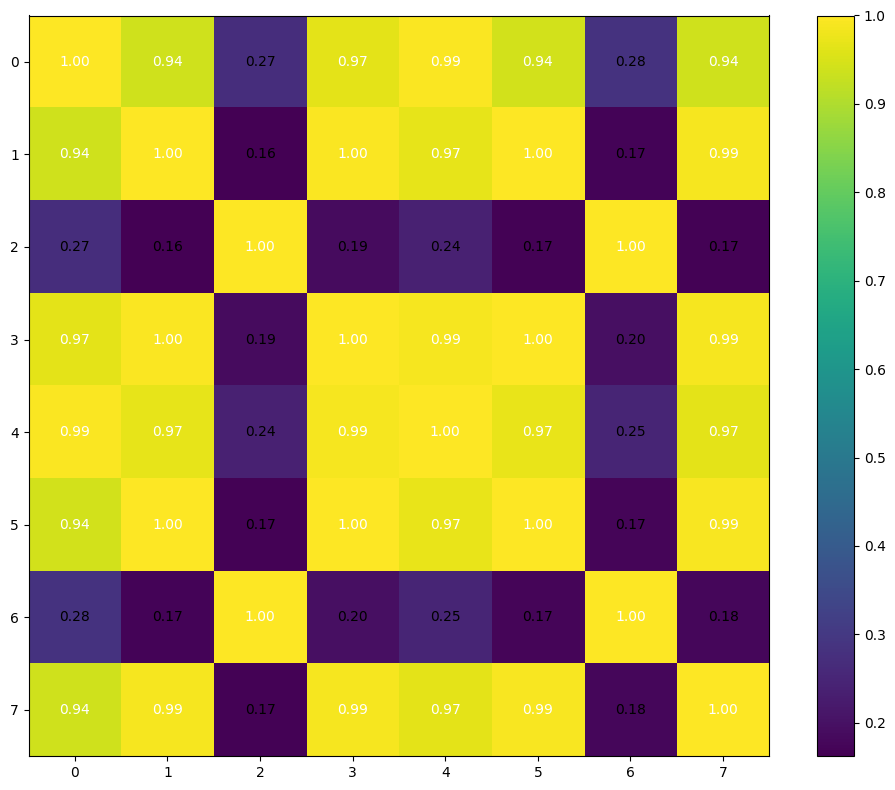

In [4]:
from mlxtend.plotting import heatmap
from matplotlib import pyplot as plt
import numpy as np
cm = np.corrcoef(df_train_data.values.T)
hm = heatmap(cm,
             figsize=(10,8))
plt.tight_layout()

In [5]:
train_X, train_y = df_train_data.drop('7', axis=1).values, df_train_data['7'].values
valid_X, valid_y = df_valid_data.drop('7', axis=1).values, df_valid_data['7'].values

In [6]:
low_cor_train_X = train_X[:, [2, 5]]
low_cor_valid_X = valid_X[:, [2, 5]]

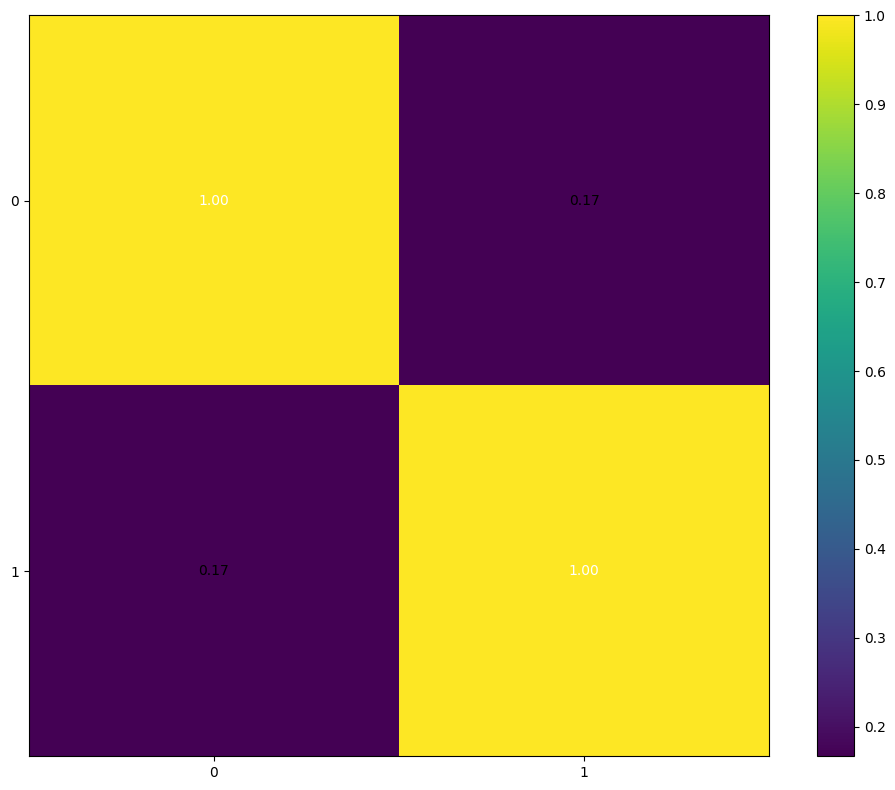

In [7]:
cm = np.corrcoef(low_cor_train_X.T)
hm = heatmap(cm,
             figsize=(10,8))
plt.tight_layout()

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_low_cor_train_X = sc.fit_transform(low_cor_train_X)
model = Ridge()
model.fit(sc_low_cor_train_X, train_y)
mean_squared_error(train_y, model.predict(sc_low_cor_train_X))

0.09283743681973958

In [23]:
sc_low_cor_valid_X = sc.transform(low_cor_valid_X)
mean_squared_error(valid_y, model.predict(sc_low_cor_valid_X))

0.08558075153135247

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100],           # значения параметра регуляризации
    'fit_intercept': [True, False]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Запуск GridSearchCV на ваших данных
grid_search.fit(sc_low_cor_train_X, train_y)  # Замените X_train, y_train своими данными

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'alpha': 0.1, 'fit_intercept': True}


In [30]:
model = grid_search.best_estimator_

In [31]:
mean_squared_error(train_y, model.predict(sc_low_cor_train_X))

0.09282207094413025

In [32]:
mean_squared_error(valid_y, model.predict(sc_low_cor_valid_X))

0.08557995497910846

In [9]:
first_part_of_train_X = low_cor_train_X[:,1].reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_1 = LinearRegression()
model_1.fit(first_part_of_train_X, train_y)
mean_squared_error(model_1.predict(first_part_of_train_X), train_y)

0.09285711313369936

In [10]:
first_part_of_valid_X = low_cor_valid_X[:,1].reshape(-1, 1)
mean_squared_error(model_1.predict(first_part_of_valid_X), valid_y)

0.0864296542610869

In [11]:
second_part_of_train_X = low_cor_train_X[:,0].reshape(-1, 1)
second_part_of_valid_X = low_cor_valid_X[:,0].reshape(-1, 1)

In [12]:
second_part_of_valid_X.dtype

dtype('float64')

In [13]:
ejections_of_train = []
for i, a in enumerate(second_part_of_train_X.flatten()):
    if a != -0.5686304806687642:
        ejections_of_train.append(i)


In [14]:
len(ejections_of_train) / second_part_of_train_X.shape[0]

0.07857142857142857

In [15]:
new_train_y = train_y - model_1.predict(first_part_of_train_X)
new_valid_y = valid_y - model_1.predict(first_part_of_valid_X)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
model_2 = GradientBoostingRegressor()
model_2.fit(second_part_of_train_X, new_train_y)
mean_squared_error(model_2.predict(second_part_of_train_X), new_train_y)

0.09285711313369936

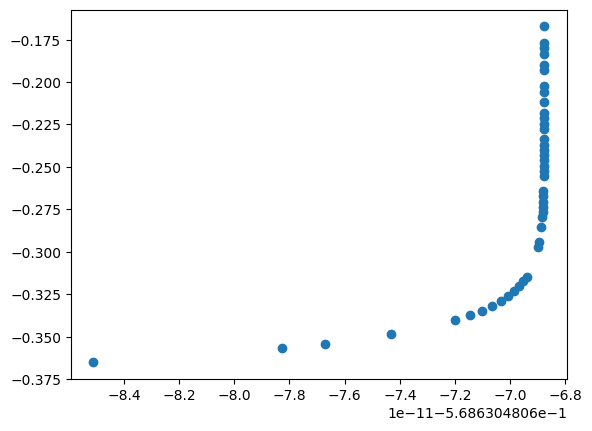

In [17]:
plt.scatter(second_part_of_train_X[ejections_of_train], first_part_of_train_X[ejections_of_train])

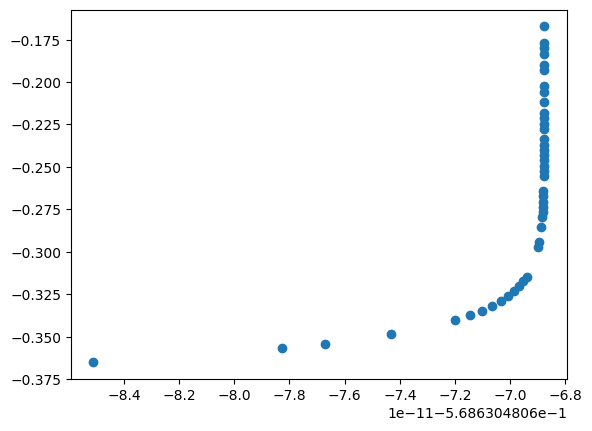

In [18]:
x = np.array(second_part_of_train_X[ejections_of_train])
y = np.array(first_part_of_train_X[ejections_of_train])
plt.scatter(x, y)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_7184\3169003533.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.exp(x), np.log(y))


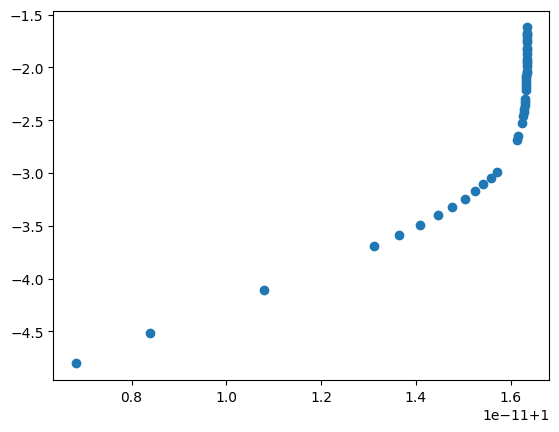

In [19]:
x -= x.min()
y -= y.min()
plt.scatter(np.exp(x), np.log(y))

In [20]:
np.log10(y)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_7184\4048949146.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(y)


array([[-0.93583143],
       [-1.55757626],
       [-0.86160636],
       [-1.03770063],
       [-0.75597699],
       [-0.95932972],
       [-0.74038813],
       [-0.73277432],
       [-2.08552383],
       [-1.40864059],
       [-1.16779893],
       [       -inf],
       [-0.92450096],
       [-0.88167417],
       [-0.91343178],
       [-0.84233646],
       [-0.83298067],
       [-1.34926784],
       [-1.2967494 ],
       [-0.76396013],
       [-1.95984837],
       [-1.44152136],
       [-1.09824626],
       [-1.01011375],
       [-0.89202935],
       [-1.32225411],
       [-1.14941368],
       [-1.05212256],
       [-0.78871751],
       [-0.9474363 ],
       [-0.72527586],
       [-0.79725544],
       [-1.5154758 ],
       [-0.90261169],
       [-1.60404552],
       [-1.47698341],
       [-0.99690026],
       [-1.06699981],
       [-0.81479145],
       [-0.85187581],
       [-1.37798509],
       [-1.78229647],
       [-1.02370615],
       [-0.70343757]])